## Statsbomb open dataset exploratory data analysis related to team formations and their impact to match outcome
The notebook contains EDA analysis of the open dataset provided by Statsboomb and measurement of impacts of team formation on goals in professional football using survival analysis.

In [23]:
import consts
import pandas as pd

In [24]:
df_match_kpi = pd.read_csv(consts.MATCH_KPI_FILE_PATH)
df_attack_formations_scores = df_match_kpi.loc[df_match_kpi["home_or_away"] == 1][
    ["formation", "opposing_team_formation", "score"]].groupby(
    ["formation", "opposing_team_formation"]).sum().reset_index()
df_defense_formations_scores = df_match_kpi.loc[df_match_kpi["home_or_away"] == 0][
    ["formation", "opposing_team_formation", "score"]].groupby(
    ["formation", "opposing_team_formation"]).sum().reset_index()
df_attack_defense_scores_pivot_table = pd.pivot_table(
    df_attack_formations_scores, index=["formation"], columns=["opposing_team_formation"],
    values="score", aggfunc="sum", margins=True, margins_name='Sum')
df_defense_attack_scores_pivot_table = pd.pivot_table(
    df_defense_formations_scores, index=["formation"], columns=["opposing_team_formation"],
    values="score", aggfunc="sum", margins=True, margins_name='Sum')

The most played formations are shown in the following table. To reduce chart clutter, the pie chart contains only the 10 most played formations.

    formation  count
0        4231   1749
1         433   1445
2         442   1135
3        4141    469
4       41212    361
5         352    335
6        4411    320
7         343    235
8        3421    158
9        3412    126
10        451     92
11       3511     75
12       4321     57
13      41221     41
14       4222     28
15      32221     14
16       3142      6
17      42211      6
18       5221      3
19       3232      2
20       4132      2
21        532      2
22       4312      2
23        541      2
24      42121      1


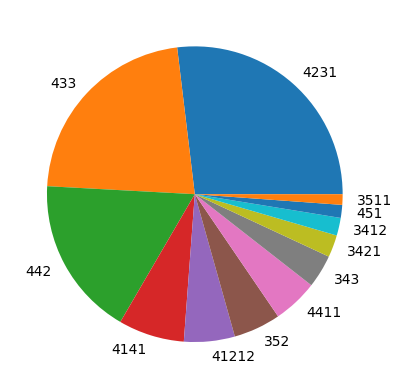

In [51]:
import matplotlib.pyplot as plt

total_formations_per_game = df_match_kpi[["match_id", "formation"]].value_counts().reset_index()["formation"].value_counts().reset_index()
most_played_formations = total_formations_per_game.loc[total_formations_per_game["count"] > 70]

print(total_formations_per_game)

plt.pie(most_played_formations["count"], labels=most_played_formations["formation"])
plt.show()


In [63]:
print(df_defense_attack_scores_pivot_table.loc[df_defense_attack_scores_pivot_table["Sum"] > 0])

opposing_team_formation    343    352    433    442   451  532  541  3142  \
formation                                                                   
343                       16.0   12.0   20.0   21.0   0.0  0.0  0.0   0.0   
352                       13.0   21.0   52.0   29.0   0.0  0.0  0.0   0.0   
433                       37.0   40.0  177.0  267.0  14.0  2.0  0.0   0.0   
442                        8.0   24.0  124.0  146.0   6.0  0.0  0.0   2.0   
451                        2.0    1.0   11.0    6.0   0.0  0.0  0.0   0.0   
3142                       0.0    0.0    0.0    0.0   0.0  0.0  0.0   0.0   
3232                       0.0    0.0    0.0    0.0   0.0  0.0  0.0   0.0   
3412                       4.0   11.0    9.0   19.0   0.0  0.0  0.0   0.0   
3421                      21.0   17.0   17.0   18.0   0.0  0.0  0.0   0.0   
3511                       0.0   10.0    2.0    0.0   4.0  0.0  0.0   0.0   
4141                       6.0    1.0   37.0   41.0   2.0  0.0  0.0   0.0   

In [57]:
def fillna(df, val=0.0):
    for c in df.columns:
        df[c] = df[c].fillna(val)

fillna(df_attack_defense_scores_pivot_table)
fillna(df_defense_attack_scores_pivot_table)

In [59]:
df_attack_defense_scores_pivot_table

opposing_team_formation,343,352,433,442,451,532,3142,3232,3412,3421,...,4312,4321,4411,5221,32221,41212,41221,42121,42211,Sum
formation,,,,,,,,,,,,,,,,,,,,,
343,16.0,17.0,31.0,15.0,6.0,0.0,0.0,0.0,4.0,9.0,...,0.0,2.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,144
352,6.0,17.0,56.0,25.0,13.0,0.0,0.0,0.0,8.0,16.0,...,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,200
433,66.0,96.0,203.0,307.0,38.0,0.0,0.0,0.0,29.0,28.0,...,0.0,11.0,74.0,0.0,0.0,67.0,0.0,0.0,0.0,1591
442,32.0,47.0,179.0,187.0,13.0,2.0,0.0,0.0,11.0,12.0,...,0.0,2.0,31.0,0.0,0.0,36.0,2.0,0.0,0.0,850
451,1.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,35
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3142,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [61]:
df_attack_defense_scores_pivot_table.loc[df_attack_defense_scores_pivot_table["Sum"] == 0]

opposing_team_formation,343,352,433,442,451,532,3142,3232,3412,3421,...,4312,4321,4411,5221,32221,41212,41221,42121,42211,Sum
formation,,,,,,,,,,,,,,,,,,,,,
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [60]:
df_defense_attack_scores_pivot_table

opposing_team_formation,343,352,433,442,451,532,541,3142,3232,3412,...,4231,4312,4321,4411,5221,32221,41212,41221,42211,Sum
formation,,,,,,,,,,,,,,,,,,,,,
343,16.0,12.0,20.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,...,36.0,0.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,123
352,13.0,21.0,52.0,29.0,0.0,0.0,0.0,0.0,0.0,9.0,...,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,172
433,37.0,40.0,177.0,267.0,14.0,2.0,0.0,0.0,0.0,16.0,...,406.0,0.0,3.0,46.0,0.0,0.0,57.0,0.0,0.0,1140
442,8.0,24.0,124.0,146.0,6.0,0.0,0.0,2.0,0.0,6.0,...,173.0,3.0,9.0,28.0,0.0,0.0,25.0,0.0,0.0,598
451,2.0,1.0,11.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,9
3232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2
3412,4.0,11.0,9.0,19.0,0.0,0.0,0.0,0.0,0.0,7.0,...,15.0,0.0,0.0,2.0,0.0,1.0,5.0,0.0,0.0,81


In [66]:
df_defense_attack_scores_pivot_table.loc[df_defense_attack_scores_pivot_table["Sum"] == 0]

opposing_team_formation,343,352,433,442,451,532,541,3142,3232,3412,...,4231,4312,4321,4411,5221,32221,41212,41221,42211,Sum
formation,,,,,,,,,,,,,,,,,,,,,
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
